# Exploratory Data Analysis on Order Book Dynamics of Ethereum

_____________________________________

Made by: Yelena Razzhivina, yelena.rz@outlook.com

# 1. Aims, objectives and background

## 1.1 Introduction

Lately, I have developed a keen interest in the cryptocurrency market and have been exploring ways to analyze it using data science techniques. While traditional methods of predicting and analyzing the cryptocurrency market primarily rely on common metrics such as low, high, opening, and closing prices, I believe that a more comprehensive approach is required to gain deeper insights. In this context, I find the Depth of Market (DOM) to be a fascinating aspect that deserves closer examination. DOM refers to the complete order book of buying and selling prices, recorded over time, and offers a unique perspective into market dynamics that can help shape investment decisions.

## 1.2 Aims and objectives

This study aims to provide an informative analysis on Ethereum.


The primary objectives of this study are as follows:

-   Process the evolution of the order book over time:
    1.  Assess market liquidity 
    2.  Who dominates the price, the seller or buyer?
    2.  Investigate trading activity patterns 
    4.  Bid-ask spread: The difference between the highest bid price and the lowest ask price
    5.  Determine the frequency and distribution of orders throughout the trading day

## 1.3 Steps of the project

1. Obtain Dom data from Binance 
2. Preprocessing data
3. Exploratory data analysis
4. Conclusions

## 1.4 Dataset and Libraries

Dataset:

Binance platform offers historical trade data free of charge that can be downloaded via their website: https://www.binance.com/en/landing/data. The collected data, including buy and sell orders along with timestamps, will be organized into a dataframe.


Libraries:

I will employ Python and Jupyter Notebook enviroment. In order to access the order book from Binance I will use CCXT library. To visualize my findings, I will create an Order Book Heatmap with price levels and quantity, which will allow traders to quickly identify areas of high liquidity. I will also use bar charts and overlay charts to illustrate market trends, pandas and numpy for data manipulation and analysis, matplotlib for graphical representations and scikit-learn for statistical modeling.

## Ethics of data source

This data, available for specified time intervals, is publicly accessible and does not necessitate registration. However, it is important to note that according to their privacy policy, the data should not be utilized for commercial purposes.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Creation using Binance Historical Market Data

I have acquired the market data of spot trades for the month of January 2024 from Binance's website in CSV format.

In [5]:
df = pd.read_csv("ETHUSDT-trades-2024-02.csv")

In [6]:
df

,1294754183,2283.15000000,0.02570000,58.67695500,1706745600000,False,True
0,1294754184,2283.15,0.0212,48.402780,1706745600000,False,True
1,1294754185,2283.14,0.0286,65.297804,1706745600002,True,True
2,1294754186,2283.14,0.0386,88.129204,1706745600004,True,True
3,1294754187,2283.14,0.0352,80.366528,1706745600004,True,True
4,1294754188,2283.15,0.0175,39.955125,1706745600004,False,True
...,...,...,...,...,...,...,...
31930986,1326685170,3340.09,0.0120,40.081080,1709251199998,True,True
31930987,1326685171,3340.10,0.0290,96.862900,1709251199998,False,True
31930988,1326685172,3340.09,0.0200,66.801800,1709251199998,True,True
31930989,1326685173,3340.09,0.0162,54.109458,1709251199999,True,True


## Preprocessing

Rename columns, where 
- id: Unique key given to each trade

- price: Original price for 1 ethereum

- qty: Quantity traded

- quoteQty: Amount in USDT spend for a quantity

- time: Time in milliseconds

- isBuyerMaker: if true it is 'sell', if false, it is 'buy'

- bestPrice: Match of two orders (here it is always true)

In [7]:
newColumnNames = {
    '1294754183': 'id',
    '2283.15000000': 'price',
    '0.02570000': 'qty',
    '58.67695500': 'quoteQty',
    '1706745600000': 'time',
    'False': 'isBuyerMaker',
    'True': 'bestPrice',
}
df = df.rename(columns=newColumnNames)

Check for empty values

In [8]:
df.isnull().any()

id              False
price           False
qty             False
quoteQty        False
time            False
isBuyerMaker    False
bestPrice       False
dtype: bool

Verify the accuracy of column data types.

In [9]:
df.dtypes

id                int64
price           float64
qty             float64
quoteQty        float64
time              int64
isBuyerMaker       bool
bestPrice          bool
dtype: object

I see that the 'time' column is in integer timestamp format, so I convert it from milliseconds since the Unix epoch into a human-readable date format, and set it as an index. Additionally, for clarity distinguishing between sell and buy transactions, I've introduced a 'label' column based on 'isBuyerMaker' and designated it as the index.

In [10]:
df['time'] = pd.to_datetime(df['time'], unit = 'ms')

df['label'] = df['isBuyerMaker'].apply(lambda x: 'sell' if x else 'buy')

df.set_index('label', inplace =True)
df.set_index(['time', df.index], inplace =True)
df

id    price     qty   quoteQty  \
time                    label                                           
2024-02-01 00:00:00.000 buy    1294754184  2283.15  0.0212  48.402780   
2024-02-01 00:00:00.002 sell   1294754185  2283.14  0.0286  65.297804   
2024-02-01 00:00:00.004 sell   1294754186  2283.14  0.0386  88.129204   
                        sell   1294754187  2283.14  0.0352  80.366528   
                        buy    1294754188  2283.15  0.0175  39.955125   
...                                   ...      ...     ...        ...   
2024-02-29 23:59:59.998 sell   1326685170  3340.09  0.0120  40.081080   
                        buy    1326685171  3340.10  0.0290  96.862900   
                        sell   1326685172  3340.09  0.0200  66.801800   
2024-02-29 23:59:59.999 sell   1326685173  3340.09  0.0162  54.109458   
                        sell   1326685174  3340.09  0.0104  34.736936   

                               isBuyerMaker  bestPrice  
time                    label                           
2024-02-01 00:00:00.000 buy           False       True  
2024-02-01 00:00:00.002 sell           True       True  
2024-02-01 00:00:00.004 sell           True       True  
                        sell           True       True  
                        buy           False       True  
...                                     ...        ...  
2024-02-29 23:59:59.998 sell           True       True  
                        buy           False       True  
                        sell           True       True  
2024-02-29 23:59:59.999 sell           True       True  
                        sell           True       True  

[31930991 rows x 6 columns]

Drop 'id' and 'bestPrice' columns from the dataset since they do not contribute any more meaningful information and are irrelevant for this analysis.

In [11]:
df=df.drop(columns=['bestPrice', 'id', 'isBuyerMaker'])
df

price     qty   quoteQty
time                    label                            
2024-02-01 00:00:00.000 buy    2283.15  0.0212  48.402780
2024-02-01 00:00:00.002 sell   2283.14  0.0286  65.297804
2024-02-01 00:00:00.004 sell   2283.14  0.0386  88.129204
                        sell   2283.14  0.0352  80.366528
                        buy    2283.15  0.0175  39.955125
...                                ...     ...        ...
2024-02-29 23:59:59.998 sell   3340.09  0.0120  40.081080
                        buy    3340.10  0.0290  96.862900
                        sell   3340.09  0.0200  66.801800
2024-02-29 23:59:59.999 sell   3340.09  0.0162  54.109458
                        sell   3340.09  0.0104  34.736936

[31930991 rows x 3 columns]

Aggregate the time data to ensure it can be processed in second intervals and mean of price, sum of qty and quoteQty numerical data, to make it more manageable to analyze.

In [12]:
df = df.groupby([pd.Grouper(freq='s', level='time'), 'label']).agg({'price': 'mean', 'qty': 'sum', 'quoteQty': 'sum'})

In [13]:
df.head(10)

price      qty      quoteQty
time                label                                 
2024-02-01 00:00:00 buy    2283.150   0.4886   1115.547090
                    sell   2283.140   0.9438   2154.827532
2024-02-01 00:00:01 buy    2283.150   0.1531    349.550265
                    sell   2283.140   0.0864    197.263296
2024-02-01 00:00:02 buy    2283.150   0.0261     59.590215
                    sell   2283.140   0.2626    599.552564
2024-02-01 00:00:03 buy    2283.150   0.0573    130.824495
                    sell   2283.140   0.0433     98.859962
2024-02-01 00:00:04 buy    2283.010   0.0030      6.849030
                    sell   2283.052  13.7446  31380.192814

We do not need to keep both 'buy' and 'sell' labels for one second, so we will subtract the quantity of the smaller order from the quantity of the larger order and save the result in the DataFrame

In [14]:
indices_to_drop = []

# Checking if 'qty' for 'buy' is bigger than 'qty' for 'sell'
for timestamp in df.index.levels[0]:
    try:
        buy_qty = df.loc[(timestamp, 'buy'), 'qty']
        sell_qty = df.loc[(timestamp, 'sell'), 'qty']
        buy_quote_qty = df.loc[(timestamp, 'buy'), 'quoteQty']
        sell_quote_qty = df.loc[(timestamp, 'sell'), 'quoteQty']

        if buy_qty > sell_qty:
            df.loc[(timestamp, 'buy'), 'qty'] -= sell_qty
            df.loc[(timestamp, 'buy'), 'quoteQty'] -= sell_quote_qty
            indices_to_drop.append((timestamp, 'sell'))
        else:
            df.loc[(timestamp, 'sell'), 'qty'] -= buy_qty
            df.loc[(timestamp, 'sell'), 'quoteQty'] -= buy_quote_qty
            indices_to_drop.append((timestamp, 'buy'))
    except KeyError:
        pass

# Dropping rows based on the list of indices to drop
df.drop(index=indices_to_drop, inplace=True)

In [15]:
df.head(10)

,,price,qty,quoteQty
time,label,,,
2024-02-01 00:00:00,sell,2283.140000,0.4552,1039.280442
2024-02-01 00:00:01,buy,2283.150000,0.0667,152.286969
2024-02-01 00:00:02,sell,2283.140000,0.2365,539.962349
2024-02-01 00:00:03,buy,2283.150000,0.0140,31.964533
2024-02-01 00:00:04,sell,2283.052000,13.7416,31373.343784
2024-02-01 00:00:05,buy,2282.890000,2.3986,5475.741538
2024-02-01 00:00:06,sell,2282.672564,24.4350,55776.711644
2024-02-01 00:00:07,sell,2282.430000,3.0622,6989.257025
2024-02-01 00:00:08,buy,2282.440000,0.1314,299.912616


## Exploratory data analysis

1. What dominates the price: the seller or the buyer?

I created a plot featuring two lines representing 'buy' and 'sell' actions, with time segmented by day, facilitating a clear observation of monthly trends.

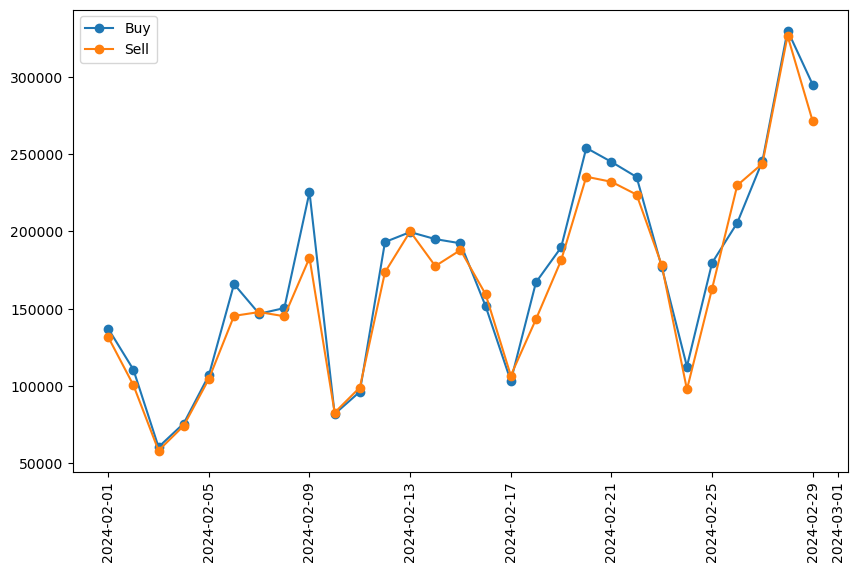

In [17]:
buy_data = df.loc[df.index.get_level_values('label') == 'buy'][['qty']]
sell_data = df.loc[df.index.get_level_values('label') == 'sell'][['qty']]
buy_data.reset_index(level='label', drop=True, inplace=True)
sell_data.reset_index(level='label', drop=True, inplace=True)

buy_data = buy_data.groupby(pd.Grouper(freq='D', level='time')).sum()
sell_data = sell_data.groupby(pd.Grouper(freq='D', level='time')).sum()

plt.figure(figsize=(10, 6)) 
plt.plot(buy_data, label='Buy', marker='o')  
plt.plot(sell_data, label='Sell', marker='o')
plt.xticks(rotation=90)

plt.legend()

I've noticed that although buyers and sellers have been active in the Ethereum market, buyers have shown a stronger presence. Analyzing the market order book data from the last month indicates a bullish sentiment surrounding Ethereum. This suggests traders are optimistic about Ethereum's growth potential, prompting them to either invest in it for the long term or speculate on its price increase. This optimism is reflected in the consistent dominance of buy orders over sell orders. 

However, on three occasions during the month (07/02, 11/02, 16/02), and notably on 26/02, sell volumes were slightly higher, indicating intermittent selling pressure amid an overall bullish trend. This may indicate profit-taking or short-term corrections within the broader upward trend. Let's examine the total volume of sales and purchases.

In [18]:
print('Sold', df.loc[df.index.get_level_values('label') == 'sell']['qty'].sum())
print('Bought', df.loc[df.index.get_level_values('label') == 'buy']['qty'].sum())

Sold 4801176.000599998
Bought 5025918.910599999


This pattern suggests that buyers were more active than sellers during this month, further supporting the bullish sentiment. It indicates that overall, there were more Ethereum bought than sold during February 2024, thus driving the price of Ethereum upwards most of the time. We can observe price appreciation:

In [19]:
df.loc[:, 'price']

time                 label
2024-02-01 00:00:00  sell     2283.140000
2024-02-01 00:00:01  buy      2283.150000
2024-02-01 00:00:02  sell     2283.140000
2024-02-01 00:00:03  buy      2283.150000
2024-02-01 00:00:04  sell     2283.052000
                                 ...     
2024-02-29 23:59:55  buy      3340.430000
2024-02-29 23:59:56  sell     3340.327895
2024-02-29 23:59:57  buy      3340.100000
2024-02-29 23:59:58  sell     3340.090000
2024-02-29 23:59:59  sell     3340.090000
Name: price, Length: 2145131, dtype: float64

2. Liquidity analysis. It is how easy an asset, such as Ethereum, can be bought or sold in the market without causing significant price changes. It depends on various factors, here we will consider:
- Bid-Ask Spread
- Depth of Market
- Volume at Price

The bid-ask spread is a measure of the supply and demand. To calculate the bid-ask spread, subtract the highest buy price from the lowest sell price. I also express the bid-ask spread in a percentage of the mid-price, which will give me a standardized measure of the bid-ask spread to the Ethereum's price.

In [20]:
lowest_sell = df.loc[df.index.get_level_values('label') == 'sell']['price'].min()
highest_buy = df.loc[df.index.get_level_values('label') == 'buy']['price'].max()

bidask_spread = highest_buy - lowest_sell
print('Bid-ask spread:', bidask_spread)

mid_price = (highest_buy + lowest_sell) / 2

bidask_spread_percentage = (bidask_spread / mid_price) * 100
print('Bid-Ask Spread Percentage:', bidask_spread_percentage, '%')

Bid-ask spread: 1281.9218382352942
Bid-Ask Spread Percentage: 44.48518152300535 %


Bid-ask spread percentage of 44.48% indicates that the bid-ask spread is significant compared to the mid-price, potentially suggesting lower liquidity. Lower liquidity result in increased price volatility, as the market may react more sharply to individual trades or news events. It requires further investigation, so let's see Volume at price. I group price by bins and calculate volume at each price level.

In [43]:
price_intervals = pd.interval_range(start=df['price'].min(), end=df['price'].max(), freq=100)

# Calculate volume at each price level
vap = pd.cut(df['price'], bins=price_intervals, labels=False)
vap = df.groupby(vap)['quoteQty'].sum()

print("Volume at Price (VAP) Profile:")
print(vap)

Volume at Price (VAP) Profile:
price
(2241.0, 2341.0]    2.642548e+09
(2341.0, 2441.0]    1.671916e+09
(2441.0, 2541.0]    2.342460e+09
(2541.0, 2641.0]    1.075163e+09
(2641.0, 2741.0]    1.041674e+09
(2741.0, 2841.0]    3.452806e+09
(2841.0, 2941.0]    4.094536e+09
(2941.0, 3041.0]    3.879552e+09
(3041.0, 3141.0]    1.389386e+09
(3141.0, 3241.0]    1.364849e+09
(3241.0, 3341.0]    2.163525e+09
(3341.0, 3441.0]    1.452718e+09
Name: quoteQty, dtype: float64


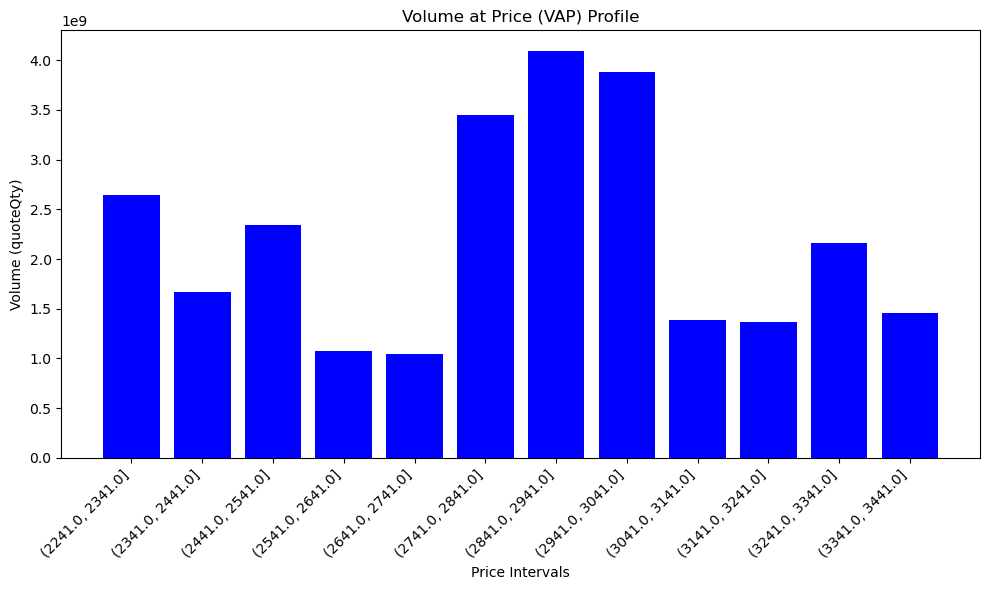

In [44]:
df['price'] = df['price'].round()
price_intervals = pd.interval_range(start=df['price'].min(), end=df['price'].max(), freq=100)

vap = pd.cut(df['price'], bins=price_intervals, labels=False)
vap = df.groupby(vap)['quoteQty'].sum()

plt.figure(figsize=(10, 6))
plt.bar(vap.index.astype(str), vap.values, width=0.8, color='blue')
plt.xlabel('Price Intervals')
plt.ylabel('Volume (quoteQty)')
plt.title('Volume at Price (VAP) Profile')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Higher volume is observed in 2741-3041 ranges compared to others, suggesting areas of significant trading activity. The VAP profile shows that there is considerable trading volume in higher price ranges (2741-3041) indicating strong demand for Ethereum at these levels and a potential for further price appreciation. 

Market Dynamics: Overall, the observations suggest a bullish market sentiment with a strong presence of buyers, indicating optimism about Ethereum's future potential and a willingness to hold or speculate on its price appreciation. However, the market remains volatile, as indicated by the bid-ask spread percentage, so let's consider market depth. It examines the distribution of buy and sell orders at different price levels. I used depth chart to show it, where it holds cumulative order quantities at each price level.

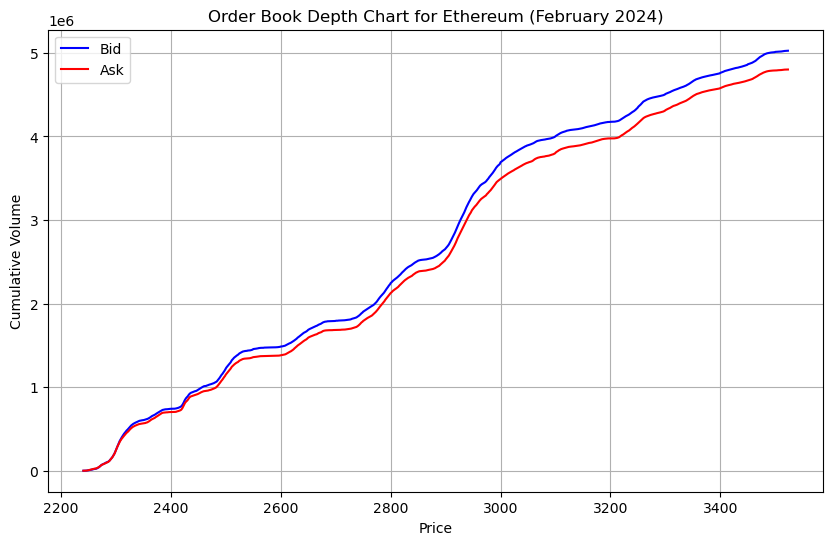

In [39]:
buy_orders = df.loc[df.index.get_level_values('label') == 'buy']
sell_orders = df.loc[df.index.get_level_values('label') == 'sell']

# Get unique price levels
price_levels = sorted(set(df['price']))

# Initialize lists for bid and ask volumes
bid_volume_depth = []
ask_volume_depth = []

# Calculate bid and ask volumes for each price level
for price in price_levels:
    bid_volume = buy_orders[buy_orders['price'] == price]['qty'].sum()
    ask_volume = sell_orders[sell_orders['price'] == price]['qty'].sum()
    bid_volume_depth.append(bid_volume)
    ask_volume_depth.append(ask_volume)

# Calculate cumulative volumes
cum_bid_volume = [sum(bid_volume_depth[:i+1]) for i in range(len(bid_volume_depth))]
cum_ask_volume = [sum(ask_volume_depth[:i+1]) for i in range(len(ask_volume_depth))]

# Create depth chart
plt.figure(figsize=(10, 6))
plt.plot(price_levels, cum_bid_volume, label='Bid', color='blue')
plt.plot(price_levels, cum_ask_volume, label='Ask', color='red')
plt.title('Order Book Depth Chart for Ethereum (February 2024)')
plt.xlabel('Price')
plt.ylabel('Cumulative Volume')
plt.legend()
plt.grid(True)
plt.show()

Observations: